
# Linear Regression

 In this challenge, I will apply simple linear regression to understand how different environmental factors affect the standardised yield of crops.
The insights will not only help local farmers maximise their harvests but also contribute to the sustainable agriculture practices .



# Data dictionary

**1. Geographic features**

- **Field_ID:** A unique identifier for each field (BigInt).

- **Elevation:** The elevation of the field above sea level in metres (Float).

- **Latitude:** Geographical latitude of the field in degrees (Float). (DUMMY VARIABLE- the simulation might have created a relationship)

- **Longitude:** Geographical longitude of the field in degrees (Float). (DUMMY VARIABLE- the simulation might have created a relationship)

- **Location:** Province the field is in (Text).

- **Slope:** The slope of the land in the field (Float).

**2. Weather features**

- **Rainfall:** Amount of rainfall in the area in mm (Float).

- **Min_temperature_C:** Average minimum temperature recorded in Celsius (Float).(DUMMY VARIABLE)

- **Max_temperature_C:** Average maximum temperature recorded in Celsius (Float).(DUMMY VARIABLE)

- **Ave_temps:** Average temperature in Celcius (Float).

**3. Soil and crop features**

- **Soil_fertility:** A measure of soil fertility where 0 is infertile soil, and 1 is very fertile soil (Float).

- **Soil_type:** Type of soil present in the field (Text).

- **pH:** pH level of the soil, which is a measure of how acidic/basic the soil is (Float).

**4. Farm management features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Pollution_level:** Level of pollution in the area where 0 is unpolluted and 1 is very polluted (Float).

- **Plot_size:** Size of the plot in the field (Ha) (Float). (DUMMY VARIABLE)

- **Chosen_crop:** Type of crop chosen for cultivation (Text).

- **Annual_yield:** Annual yield from the field (Float). This is the total output of the field. The field size and type of crop will affect the Annual Yield (DUMMY VARIABLE - Removed)

<br>

**5. Target variable**
- **Standard_yield:** Standardised yield expected from the field, normalised per crop (Float). This is independent of field size, or crop type. Multiplying this number by the field size, and average crop yield will give the Annual_Yield.

---

Our first task is to load this dataset and peek at what sort of values each column contains. This initial glimpse will help us understand the type of data we will be working with. As you explore the data, consider the following questions:

- How many different fields are we examining?
- Are there any features that you think may be having an impact on the crop yield produced by different farms?


In [25]:
# Model solution
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Maji_Ndogo_agric_survey_data_small.csv'  # Replace with your file path
dataset = pd.read_csv(file_path)

# Display the first five rows
print(dataset.head())

# Check the shape of the DataFrame
print(dataset.shape)

   Unnamed: 0  Field_ID  Elevation  Latitude  Longitude        Location  \
0       40734     40734  786.05580 -7.389911  -7.556202    Rural_Akatsi   
1       30629     30629  674.33410 -7.736849  -1.051539    Rural_Sokoto   
2       39924     39924  826.53390 -9.926616   0.115156    Rural_Sokoto   
3        5754      5754  574.94617 -2.420131  -6.592215  Rural_Kilimani   
4       14146     14146  886.35300 -3.055434  -7.952609  Rural_Kilimani   

       Slope  Rainfall  Min_temperature_C  Max_temperature_C  Ave_temps  \
0  14.795113    1125.2               -3.1               33.1      15.00   
1  11.374611    1450.7               -3.9               30.6      13.35   
2  11.339692    2208.9               -1.8               28.4      13.30   
3   7.109855     328.8               -5.8               32.2      13.20   
4  55.007656     785.2               -2.5               31.0      14.25   

   Soil_Fertility Soil_Type        pH  Pollution_Level  Plot_Size Chosen_Crop  \
0            0.62

In [26]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Maji_Ndogo_agric_survey_data_small.csv'  # Replace with your file path
MD_agric_df = pd.read_csv(file_path)
MD_agric_df = MD_agric_df.drop(['Unnamed: 0'],axis=1)
MD_agric_df = MD_agric_df.rename(columns = {'Standard_Yield':'Standard_yield'})

MD_agric_df.rename(columns={'Annual_yield': 'Crop_type_Temp', 'Crop_type': 'Annual_yield'}, inplace=True)
MD_agric_df.rename(columns={'Crop_type_Temp': 'Crop_type'}, inplace=True)
MD_agric_df['Elevation'] = MD_agric_df['Elevation'].abs()
MD_agric_df.rename(columns={'Chosen_Crop':'Crop_type'}, inplace=True)

# Correcting 'Crop_type' column
def correct_crop_type(crop):
    if crop == 'maize':
        return 'corn'
    else:
        return crop
    crop = crop.strip()  # Remove trailing spaces
    corrections = {
        'cassaval': 'cassava',
        'wheatn': 'wheat',
        'teaa': 'tea'
    }
    return corrections.get(crop, crop)  # Get the corrected crop type, or return the original if not in corrections

# Apply the correction function to the Crop_type column
MD_agric_df['Crop_type'] = MD_agric_df['Crop_type'].apply(correct_crop_type)
df = MD_agric_df

df

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_Fertility,Soil_Type,pH,Pollution_Level,Plot_Size,Crop_type,Annual_Yield,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,cassava,0.751354,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,cassava,1.069865,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,tea,2.208801,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,cassava,1.277635,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,wheat,0.832614,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.3,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,potato,0.609930,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.8,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,corn,3.812289,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,1586.6,-3.8,33.4,14.80,0.64,Volcanic,5.385873,8.221326e-09,2.1,tea,1.681629,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.2,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,cassava,0.659874,0.507595


# Analysis

## Visualising the relationship


The  goal is to determine whether any of the features in our dataset are influencing the `Standard_yield` of a farm. If I can figure out what these relationships are, then I can use them to start predicting what future yields will be, based on these features.

For this analysis, I want to find whether any features have a linear relationship with `Standard_yield` so that I can fit a linear regression model to the data. This is important because if we try and fit a linear regression model to non-linear data, our predictions will not be very good.
I have many features in our dataset that could potentially be having an impact on `Standard_yield`. To begin unraveling this mystery, let's start by looking at `Ave_temps`, the average temperature of the region, and its relationship to `Standard_yield`.




I will create a function named `temp_yield_correlation` that:
1. Takes a DataFrame and the names of the average temperature column (`Ave_temps`) and the standard yield column (`Standard_yield`) as parameters.
2. Generates a scatter plot to visualise the relationship between average temperature and standard yield.
3. Calculates the Pearson correlation coefficient between these two variables to quantify their linear relationship.
4. Returns the Pearson correlation coefficient.
5. Reflect on the scatter plot. Does suggest a linear relationship, or is the story more complex?


In [27]:

def temp_yield_correlation(df, temp_col, yield_col):

  from matplotlib import pyplot as plt
  import pandas as pd
  import numpy as np
  from scipy.stats import pearsonr


  """
    Visualizes the relationship between average temperature and standard yield in a scatter plot,
    calculates the Pearson correlation coefficient, and returns this coefficient.

    Parameters:
    - df: DataFrame containing the data.
    - temp_col: Name of the column representing average temperature ('Ave_temps').
    - yield_col: Name of the column representing standard yield ('Standard_yield').

    Returns:
    - The Pearson correlation coefficient as a float.
  """
  dataset =df
  plt.scatter(df['Ave_temps'], df['Standard_yield'])
  plt.xlabel('Average Temperature')
  plt.ylabel('Standard Yield')
  plt.title('Relationship between Average Temperature and Standard Yield')
  plt.show()

  # Calculate Pearson correlation coefficient
  correlation, _ = pearsonr(df['Ave_temps'], df['Standard_yield'])

  return correlation



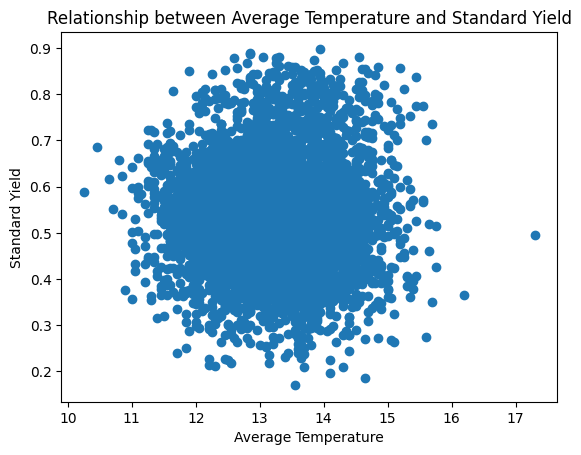

Pearson correlation coefficient: 0.006785950289020175


In [28]:
correlation = temp_yield_correlation(df, 'Ave_temps', 'Standard_yield')
print("Pearson correlation coefficient:", correlation)



## pollution as a predictor


I will  visualise the relationship between pollution and crop yields and build a simple linear regression model.


1. Create a function named pollution_yield_relationship that takes in a DataFrame and the names of the 'Pollution_level' and 'Standard_yield' columns.
2. The function should generate a scatter plot to visualise the relationship and also fit a linear regression model.
3. The function should return the slope and intercept of the fitted model as a tuple.
4. Use the function to analyse the Pollution_level against Standard_yield.

In [7]:

def pollution_yield_relationship(df, pollution_col, yield_col):
  import matplotlib.pyplot  as plt
  import pandas as pd
  import numpy as np
  from sklearn.linear_model import LinearRegression
  X = df[['Pollution_Level']]
  y = df['Standard_yield']


  model = LinearRegression()
  model.fit(X,y)
  prediction = model.predict(X)

  plt.scatter(X,y)
  plt.plot(X,prediction,color = 'red',label ='regresion linne')
  plt.xlabel(pollution_col)
  plt.ylabel(yield_col)
  plt.legend()
  plt.show()

  return model.coef_[0],model.intercept_




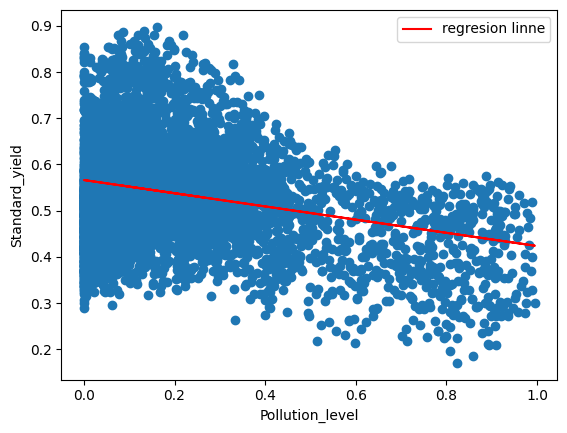

Slope: -0.1427617720986607
Intercept: 0.566268441539338


In [8]:
slope_intercept = pollution_yield_relationship(df, 'Pollution_level', 'Standard_yield')
print("Slope:", slope_intercept[0])
print("Intercept:", slope_intercept[1])

##  Evaluating pollution's predictive power

Upon visually examining the relationship between Standard_yield, Ave_temps, and Pollution_level, it seems that Pollution_level exhibits a more linear correlation with yield. This observation suggests that we could potentially utilize a simple linear regression model to predict farm yield based on pollution levels. However, before proceeding, it's crucial to evaluate the robustness of the connection we've established between Pollution_level and Standard_yield. Is it solidly supported by statistical validation, or is it vulnerable to fluctuations?


I will create a function named evaluate_pollution_model that:
- Takes a DataFrame as input.
- Trains a simple linear regression model using Pollution_level as the predictor for the entire dataset.
- Calculates and returns the R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) of the model's performance.


In [70]:


def evaluate_pollution_model(df):
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    import numpy as np
    import pandas as pd
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from sklearn.model_selection import train_test_split


    X = df[['Pollution_Level']].values
    y = df['Standard_yield'].values

    model= LinearRegression()
    model.fit(X,y)
    predict = mode   
    l.predict(X)

    r2 = r2_score(y, predict)
    mse = mean_squared_error(y, predict)
    mae = mean_absolute_error(y, predict)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

    print("R-squared:", r2)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)



In [71]:
evaluation_metrics = evaluate_pollution_model(dataset)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")

KeyError: 'Standard_yield'

A tuple containing numerical values for R-squared, MAE, MSE, and RMSE:

```python
R-squared: 0.08165932890115546
MAE: 0.08554642090904992
MSE: 0.011477732254034848
RMSE: 0.10713417873878928

```

In [57]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_pollution_model(df):
    X = df[['Pollution_Level']].values
    y = df['Standard_yield'].Values

    model = LinearRegression()
    model.fit(X, y)

    predictions = model.predict(X)

    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)

    return r2, mae, mse, rmse


evaluation_metrics = evaluate_pollution_model(dataset)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")



KeyError: 'Standard_yield'

## Train-test split in action

As I delve deeper into the relationship between `Pollution_level` and `Standard_yield`, I  must ensure our model is not merely memorising the data but truly understanding it. This brings us to the pivotal technique of Train-Test Split.


I will create a function named `train_test_split_evaluate` that:
1. Takes in the DataFrame.
2. Separates it into features (`X`) based on `Pollution_level` and the target (`y`) based on `Standard_yield`.
3. Splits the data into training and testing sets using an 80-20 split and sets random_state to 42 for reproducibility.
4. Trains a simple linear regression model on the training set.
5. Evaluates the model on the test set, calculating the R-squared, MAE, MSE, and RMSE.
6. Returns a tuple containing these evaluation metrics as well as two variables: `predictions` that contains the predicted values generated by the linear regression model and `y_test` that contains the actual values of the dependent variable. (These two variables will be used in the next challenge).


In [62]:
# Your code here
# Hint: You'll need sklearn's train_test_split function

### START FUNCTION
def train_test_split_evaluate(df):
  import matplotlib.pyplot as plt
  from sklearn.linear_model import LinearRegression
  import numpy as np
  import pandas as pd
  from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
  from sklearn.model_selection import train_test_split

  X = df[['Pollution_Level']].values
  y = df['Standard_yield'].values

  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)


  model = LinearRegression()
  model.fit(X_train,y_train)

  predictions = model.predict(X_test)


  # Evaluating the model
  r2 = r2_score(y_test, predictions)
  mae = mean_absolute_error(y_test, predictions)
  mse = mean_squared_error(y_test, predictions)
  rmse = np.sqrt(mse)

    # Returning both evaluation metrics and the necessary data for Challenge 5
  return (r2, mae, mse, rmse), (predictions, y_test)


    # Insert your code here
### END FUNCTION

In [63]:
evaluation_metrics, (predictions, y_test) = train_test_split_evaluate(df)

print(f"Evaluation Metrics on Test Set:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")


Evaluation Metrics on Test Set:
R-squared: 0.08065722992150837
MAE: 0.08794942119747501
MSE: 0.012250634233355658
RMSE: 0.11068258324305436


##  Diagnosing model fit through residual analysis


I will Create a function named analyse_model_residuals that:
1. Use the predictions and y_test obtained from Challenge 4 to calculate the residuals.
2. Plot these residuals to assess their distribution and identify any patterns.
3. Calculate the mean and standard deviation of the residuals, providing further insights into the model's performance.
4. Reflect on what the residual analysis reveals about your model's accuracy and its assumptions.


In [68]:

def analyse_model_residuals(predictions, y_test):

  import matplotlib.pyplot as plt
  from sklearn.linear_model import LinearRegression
  import numpy as np
  import pandas as pd
  from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
  from sklearn.model_selection import train_test_split

  # Step 1: Calculate the residuals
  residuals = y_test - predictions

  # Step 2: Plot the residuals
  plt.figure(figsize=(8, 6))
  plt.hist(residuals, bins=20, edgecolor='black')
  plt.axhline(y=0, color='r', linestyle='--')
  plt.title('Residuals Plot')
  plt.xlabel('Predicted Values')
  plt.ylabel('Residuals')
  plt.show()

    # Step 3: Calculate the mean and standard deviation of the residuals
  mean_residuals = np.mean(residuals)
  std_residuals = np.std(residuals)

  print(f"Mean of Residuals: {mean_residuals}")
  print(f"Standard Deviation of Residuals: {std_residuals}")
   

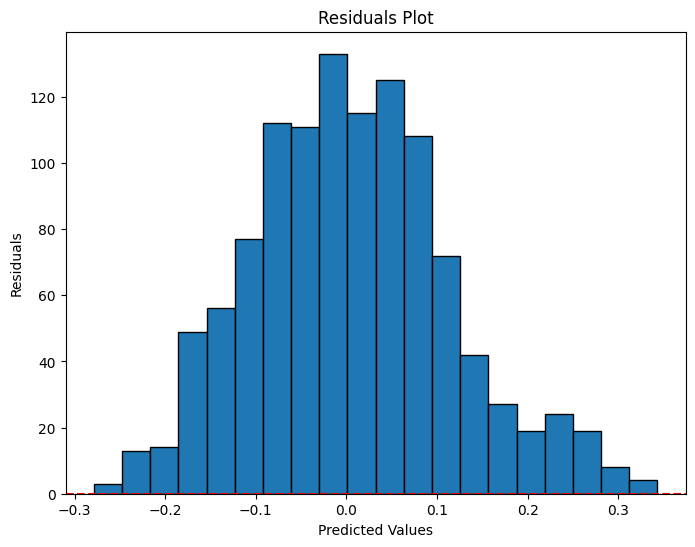

Mean of Residuals: 0.005858023192321701
Standard Deviation of Residuals: 0.11052745268770957


TypeError: cannot unpack non-iterable NoneType object

In [69]:
# Output 
evaluation_metrics, (predictions, y_test) = train_test_split_evaluate(df)

mean_residual, std_residual = analyse_model_residuals(predictions, y_test)


/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarn

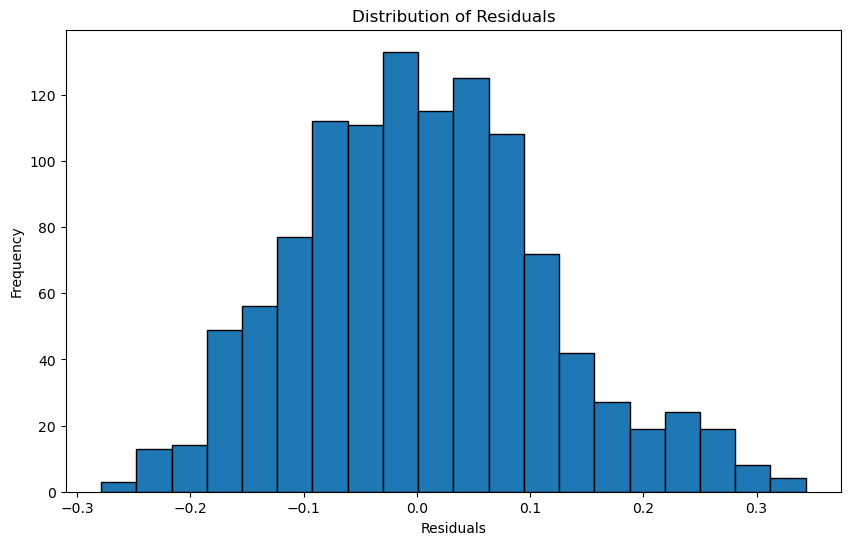

In [ ]:
import matplotlib.pyplot as plt

def analyse_model_residuals(predictions, y_test):
    # Calculating residuals
    residuals = y_test - predictions

    # Plotting the residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    # Alternatively, for a scatter plot of residuals vs. predicted values:
    # plt.scatter(predictions, residuals)
    # plt.title('Residuals vs. Predicted Values')
    # plt.xlabel('Predicted Values')
    # plt.ylabel('Residuals')
    # plt.axhline(y=0, color='r', linestyle='--')

    # Calculating and returning the mean and standard deviation of residuals
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)

    return mean_residual, std_residual

evaluation_metrics, (predictions, y_test) = train_test_split_evaluate(dataset)

mean_residual, std_residual = analyse_model_residuals(predictions, y_test)


Linear regression, while valuable, assumes a simple relationship between predictors and outcomes. However, the complexities of crop yields in Maji Ndogo—affected by temperature, rainfall, and pollution—often reflect nonlinear interactions. Our initial model with Ave_temps highlighted this, suggesting that temperature’s impact on yields may be more intricate than a straight line can convey.

